In [ ]:
import pandas as pd
import numpy 
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
rng = numpy.random


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
spreadsheet = '/content/drive/MyDrive/Colab Notebooks/LR_ML.xlsx'

data = pd.read_excel(spreadsheet)

In [ ]:
data.head()

,Machine Age (Months),Mean Time Between Failure (Days)
0,1,26
1,2,28
2,3,24
3,4,25
4,5,25


In [ ]:
# HyperParameters
learning_rate = 0.02
training_epochs = 3000

In [ ]:
# Parameters
display_step = 50

In [ ]:
Months = data ['Machine Age (Months)'].values
Days = data ['Mean Time Between Failure (Days)'].values

In [ ]:
x_train = numpy.asarray(Months)	
y_train = numpy.asarray(Days)


In [ ]:
number_of_samples = x_train.shape[0]
number_of_samples

30

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

In [ ]:
X =tf.placeholder('float')
Y =tf.placeholder('float')

In [ ]:
W = tf.Variable(rng.randn(),name='weight')
b = tf.Variable(rng.randn(),name='bias')

In [ ]:
# Construct a linear model (y=WX+b)
prediction = tf.add(tf.multiply(X,W),b)

In [ ]:
# Mean squared error This is the error in the calculation to try to minimize
error = tf.reduce_sum(tf.pow(prediction-Y, 2))/(2*number_of_samples)

In [ ]:
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

In [ ]:
init = tf.global_variables_initializer()

Epoch: 0050 error= 78.337974548 W= 0.2093423 b= 5.0878468
Epoch: 0100 error= 52.128349304 W= 0.06510021 b= 9.293455
Epoch: 0150 error= 34.843975067 W= -0.052050784 b= 12.70918
Epoch: 0200 error= 23.446281433 W= -0.14719822 b= 15.4833555
Epoch: 0250 error= 15.930858612 W= -0.22447589 b= 17.73651
Epoch: 0300 error= 10.975846291 W= -0.28723925 b= 19.566477
Epoch: 0350 error= 7.709399700 W= -0.33821312 b= 21.0527
Epoch: 0400 error= 5.556274891 W= -0.37961406 b= 22.259811
Epoch: 0450 error= 4.137267113 W= -0.4132399 b= 23.240227
Epoch: 0500 error= 3.202290535 W= -0.44055057 b= 24.036512
Epoch: 0550 error= 2.586435795 W= -0.46273082 b= 24.683212
Epoch: 0600 error= 2.180871248 W= -0.48074633 b= 25.208483
Epoch: 0650 error= 1.913930178 W= -0.49537736 b= 25.635075
Epoch: 0700 error= 1.738300443 W= -0.50726104 b= 25.981564
Epoch: 0750 error= 1.622834921 W= -0.516912 b= 26.26295
Epoch: 0800 error= 1.546969175 W= -0.5247508 b= 26.491505
Epoch: 0850 error= 1.497170091 W= -0.53111786 b= 26.677147
Ep

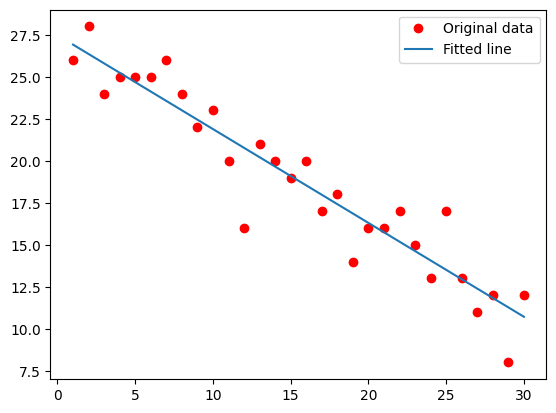

Testing... (Mean square loss Comparison)
Testing error= 5.6703725
Absolute mean square loss difference: 4.2665496


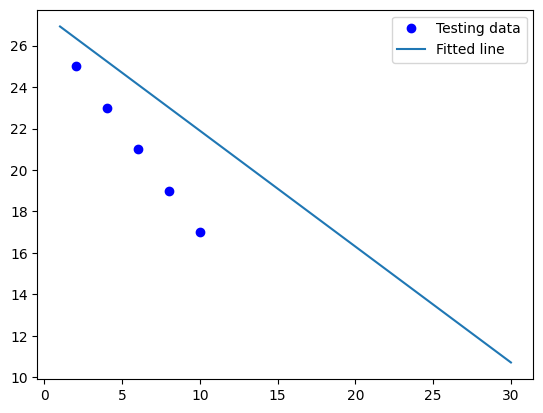

In [ ]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

        # Fit all training data
    for epoch in range(training_epochs):
          for (x, y) in zip(x_train, y_train):
               sess.run(optimizer, feed_dict={X: x, Y: y})


        # Display logs per epoch step
          if (epoch+1) % display_step == 0:
              c = sess.run(error, feed_dict={X: x_train, Y:y_train})
              print("Epoch:", '%04d' % (epoch+1), "error=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
     

    print("Optimization Finished!")
    training_error = sess.run(error, feed_dict={X: x_train, Y: y_train})
    print("Training error=", training_error, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(x_train, y_train, 'ro', label='Original data')
    plt.plot(x_train, sess.run(W) * x_train + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


       # Testing example, as requested (Issue #2)
    x_test = numpy.asarray([2,4,6,8,10])
    y_test = numpy.asarray([25,23,21,19,17])

    print("Testing... (Mean square loss Comparison)")
    testing_error = sess.run(
        tf.reduce_sum(tf.pow(prediction - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: x_test, Y: y_test})  # same function as cost above
    print("Testing error=", testing_error)
    print("Absolute mean square loss difference:", abs(
        training_error - testing_error))

    plt.plot(x_test, y_test, 'bo', label='Testing data')
    plt.plot(x_train, sess.run(W) * x_train + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
